In [2]:
from mp_api.client import MPRester
import pandas as pd

API_KEY = "4IeHY5jVcrgiKXNuAo6Jgs7yC0Z3hsli"

try:
    with MPRester(API_KEY) as mpr:
        # Search for materials with a band gap greater than 0.5 eV and check stability
        docs = mpr.materials.summary.search(
            band_gap=[0.5, None], # band_gap greater than or equal to 0.5 eV
            is_stable=True,       # material is stable (on the convex hull)
            fields=["material_id", "formula_pretty", "band_gap", "is_stable"] # request specific fields
        )

        print(f"Found {len(docs)} stable materials with a band gap >= 0.5 eV.\n")

        # Iterate through the results and print the data
        print("{:<15} {:<15} {:<15} {:<10}".format("Material ID", "Formula", "Band Gap (eV)", "Is Stable"))
        print("-" * 55)
        for doc in docs[:10]: # Print the first 10 results
            print("{:<15} {:<15} {:<15.3f} {:<10}".format(
                doc.material_id,
                doc.formula_pretty,
                doc.band_gap,
                doc.is_stable
            ))

except Exception as e:
    print(f"An error occurred: {e}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Retrieving SummaryDoc documents: 100%|██████████| 15179/15179 [00:04<00:00, 3106.29it/s]

Found 15179 stable materials with a band gap >= 0.5 eV.

Material ID     Formula         Band Gap (eV)   Is Stable 
-------------------------------------------------------
mp-11107        Ac2O3           3.523           1         
mp-32800        Ac2S3           2.296           1         
mp-1183115      AcAlO3          4.102           1         
mp-27972        AcBr3           4.103           1         
mp-30274        AcBrO           4.241           1         
mp-27971        AcCl3           5.087           1         
mp-30273        AcClO           4.445           1         
mp-866101       AcCrO3          2.003           1         
mp-985278       AcF3            6.069           1         
mp-861502       AcFeO3          0.989           1         


| MP property                       | Meaning                       | EV relevance                           |
| --------------------------------- | ----------------------------- | -------------------------------------- |
| `average_voltage`                 | Mean operating voltage        | Higher voltage → higher energy density |
| `capacity_grav` or `capacity_vol` | Specific/volumetric capacity  | Directly affects EV range              |
| `energy_density`                  | Stored energy per mass        | Primary EV metric                      |
| `formation_energy_per_atom`       | Stability                     | Safety & lifetime                      |
| `band_gap`                        | Electronic conductivity proxy | Affects rate capability                |
| `volume_change`                   | Structural change on cycling  | Degradation risk                       |



In [2]:
from mp_api.client import MPRester
API_KEY = "4IeHY5jVcrgiKXNuAo6Jgs7yC0Z3hsli"
try:


    with MPRester(API_KEY) as mpr:
        # Query for Li-based cathode materials with high energy density
        docs = mpr.materials.insertion_electrodes.search(
            working_ion="Li",
            fields=[
                "battery_id", "formula_discharge", "average_voltage"
                , "energy_grav", "energy_vol", "capacity_grav", "capacity_vol", "stability_charge", "fracA_charge", "stability_charge", "max_delta_volume", "stability_discharge", "fracA_discharge"
            ]
        )

        # Convert to pandas for research analysis
        import pandas as pd
        df = pd.DataFrame([doc.dict() for doc in docs])
        print(df)

except Exception as e:
    print(f"An error occurred: {e}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Retrieving InsertionElectrodeDoc documents: 100%|██████████| 2774/2774 [00:00<00:00, 3530.24it/s]

        battery_id formula_discharge  max_delta_volume  average_voltage  \
0         mp-28_Li             Li3Ce          2.951183        -0.444846   
1       mp-2074_Li             Li3Sb          1.569237         1.015953   
2     mp-568806_Li              LiC6          0.025414         0.084405   
3     mp-573471_Li           Li22Sn5          0.009450        -0.362516   
4      mp-22902_Li              LiBi          0.368255         0.796796   
...            ...               ...               ...              ...   
2769  mp-770930_Li         Li2NbV3O8          0.042691         3.136507   
2770  mp-771133_Li      Li4Mn5Cr3O16          0.089148         3.893608   
2771  mp-771020_Li      Li4Co5Te3O16          0.184518         3.932885   
2772  mp-771093_Li     Li3Cr10Fe5O24          0.000458         4.820463   
2773  mp-771188_Li     Li8Mn13Fe3O32          0.040725         4.227074   

      capacity_grav  capacity_vol  energy_grav   energy_vol  fracA_charge  \
0        499.595769   

In [3]:
stable = df[df["stability_charge"] < 0.100]
stable.head()

,battery_id,formula_discharge,max_delta_volume,average_voltage,capacity_grav,capacity_vol,energy_grav,energy_vol,fracA_charge,fracA_discharge,stability_charge,stability_discharge,fields_not_requested
0,mp-28_Li,Li3Ce,2.951183,-0.444846,499.595769,1295.168213,-222.242937,-576.149771,0.000000,0.750000,0.000000,0.333634,"[builder_meta, battery_type, thermo_type, batt..."
2,mp-568806_Li,LiC6,0.025414,0.084405,339.236925,734.096706,28.633212,61.961259,0.000000,0.142857,0.011936,0.002406,"[builder_meta, battery_type, thermo_type, batt..."
3,mp-573471_Li,Li22Sn5,0.009450,-0.362516,26.936090,69.584747,-9.764758,-25.225570,0.809524,0.814815,0.000000,0.010070,"[builder_meta, battery_type, thermo_type, batt..."
4,mp-22902_Li,LiBi,0.368255,0.796796,124.126099,923.538664,98.903144,735.871648,0.000000,0.500000,0.049545,0.000000,"[builder_meta, battery_type, thermo_type, batt..."
5,mp-124_Li,Li3Ag,2.736089,0.210565,624.785871,1984.816229,131.558310,417.933696,0.000000,0.750000,0.003609,0.000000,"[builder_meta, battery_type, thermo_type, batt..."


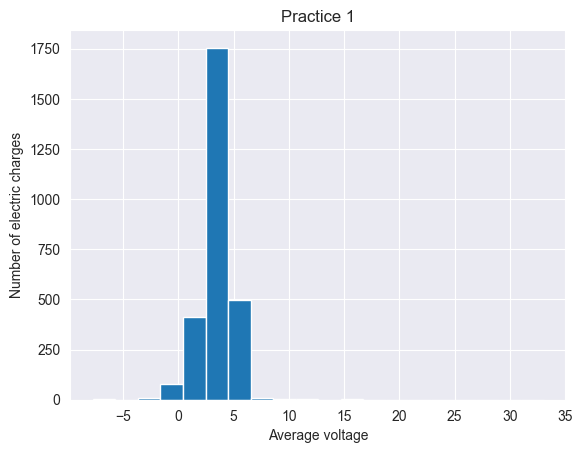

In [4]:
import matplotlib.pyplot as plt


df['average_voltage'].hist(bins=20)
plt.xlabel("Average voltage")
plt.ylabel("Number of electric charges")
plt.title("Practice 1")
plt.show()

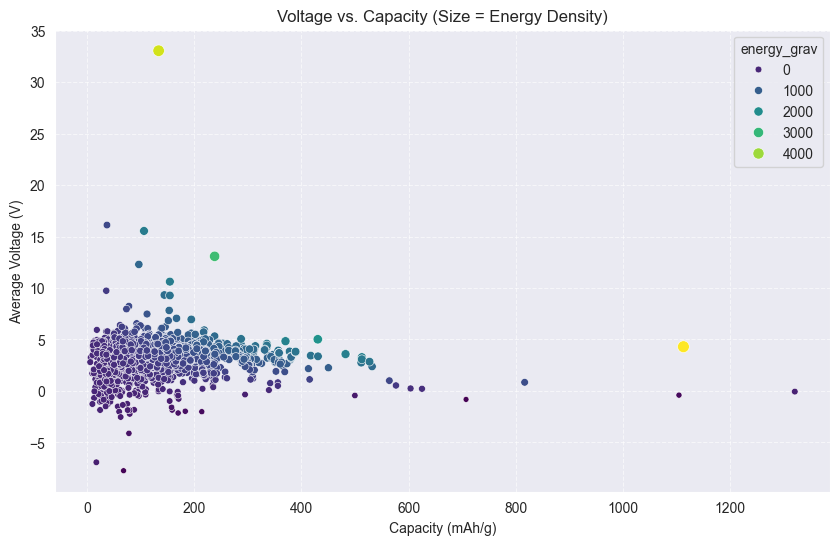

'\nMost instances fall within 0 - 200 capacity range and 0 - 5 Average Voltage range'

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='capacity_grav', y='average_voltage',
                hue='energy_grav', size='energy_grav', palette='viridis')
plt.title("Voltage vs. Capacity (Size = Energy Density)")
plt.xlabel("Capacity (mAh/g)")
plt.ylabel("Average Voltage (V)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

"""
Most instances fall within 0 - 200 capacity range and 0 - 5 Average Voltage range"""

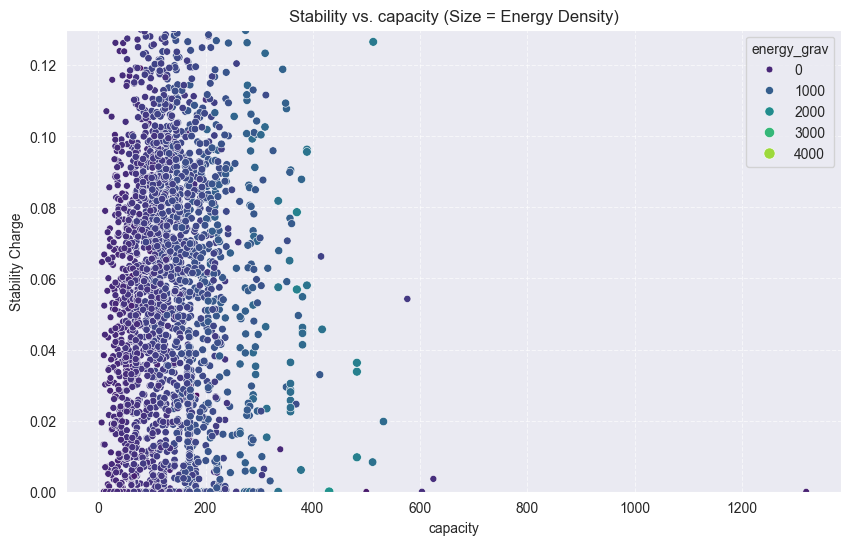

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='capacity_grav', y='stability_charge',
                hue='energy_grav', size='energy_grav', palette='viridis')
plt.title("Stability vs. capacity (Size = Energy Density)")
plt.xlabel("capacity")
plt.ylabel("Stability Charge")
#plt.xlim(300, 1400)
plt.ylim(0, 0.13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='capacity_grav', y='stability_charge',
                hue='energy_grav', size='energy_grav', palette='viridis')
plt.title("Stability vs. capacity (Size = Energy Density)")
plt.xlabel("capacity")
plt.ylabel("Stability Charge")
#plt.xlim(300, 1400)
plt.ylim(0, 0.13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [1]:
# Select only the numeric columns relevant to battery performance
cols_to_analyze = ['average_voltage', 'capacity_grav', 'energy_grav',
                   'stability_discharge', 'max_delta_volume', 'fracA_discharge']

# Calculate the Pearson correlation
correlation_matrix = df[cols_to_analyze].corr()

correlation_matrix.head()

NameError: name 'df' is not defined

In [9]:
# Example: Only analyze 'realistic' stable materials
df_clean = df[(df['stability_charge'] < 0.2) & (df['average_voltage'] > 0)]
correlation_clean = df_clean[cols_to_analyze].corr()


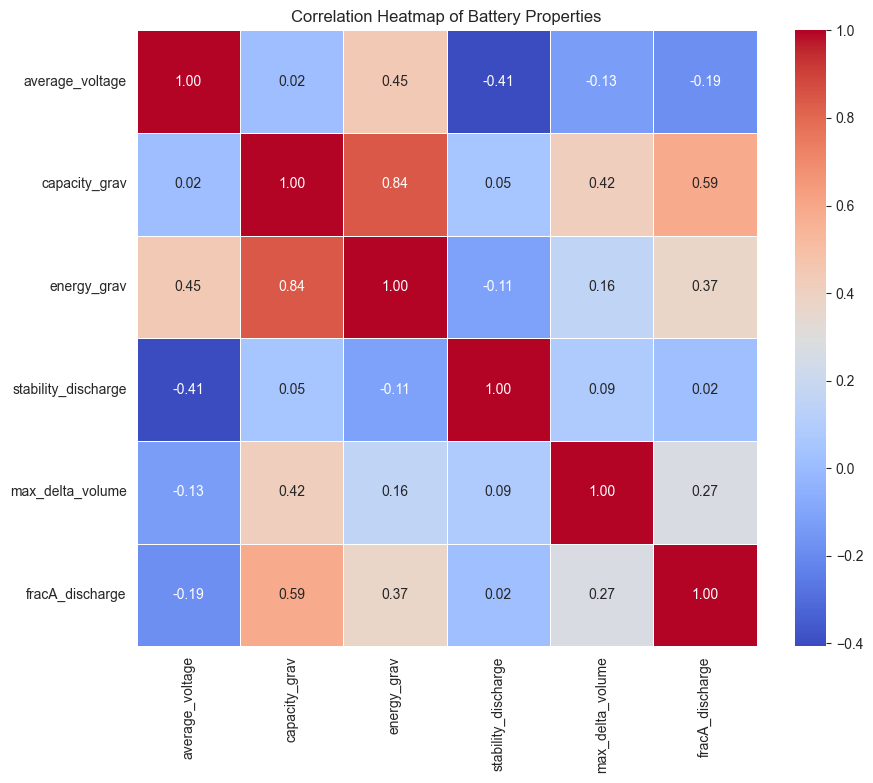

In [10]:
#- Compare correlation of energy density with capacity

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_clean, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Battery Properties")
plt.show()

In [ ]:
"""
INSIGHT:
Positive Correlation between average voltage and gravimetric capacity
Negative correlation between average voltage with stability_discharge, fracA_discharge, max_delta_volume"""

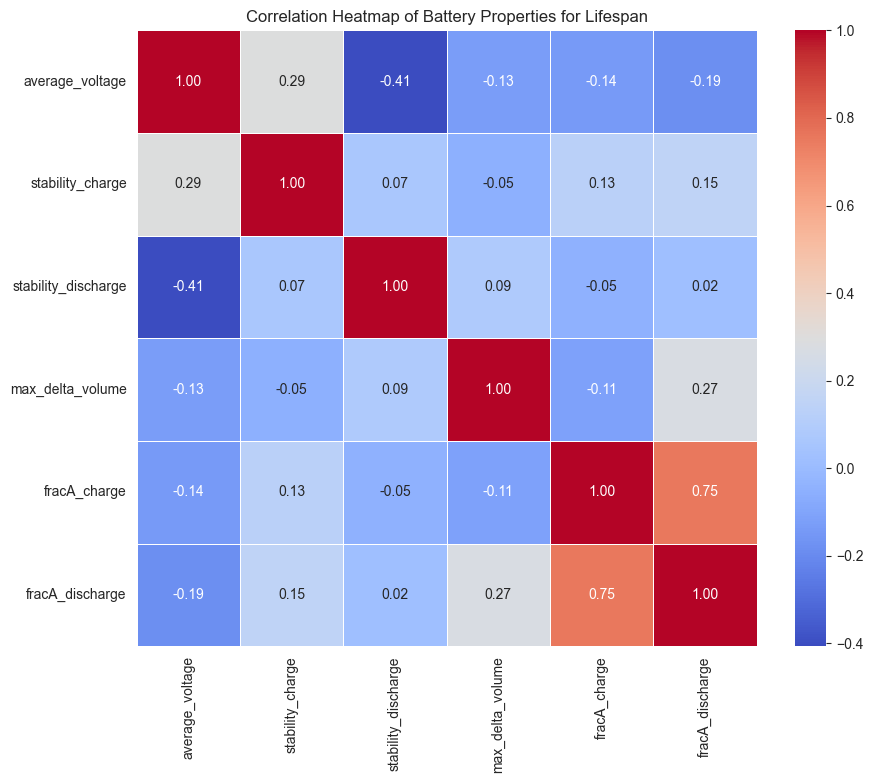

In [11]:
cols_to_analyze1 = ['average_voltage', 'stability_charge',
                   'stability_discharge', 'max_delta_volume', 'fracA_charge', 'fracA_discharge']

# Calculate the Pearson correlation
correlation_clean = df_clean[cols_to_analyze1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_clean, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Battery Properties for Lifespan")
plt.show()

In [12]:
df.describe()

,max_delta_volume,average_voltage,capacity_grav,capacity_vol,energy_grav,energy_vol,fracA_charge,fracA_discharge,stability_charge,stability_discharge
count,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000
mean,0.076529,3.418654,133.250389,462.026754,456.258341,1568.226248,0.048195,0.162324,0.108745,0.093441
std,0.536620,1.532215,86.460912,279.827565,323.570301,1082.347201,0.088068,0.099209,0.369295,0.332193
min,0.000018,-7.754751,5.962835,34.971189,-583.545844,-1721.118698,0.000000,0.010000,0.000000,0.000000
25%,0.014200,2.793356,73.604721,263.089357,241.082135,827.691570,0.000000,0.090909,0.026566,0.022619
50%,0.034758,3.537107,117.171086,403.635789,419.225881,1420.127576,0.000000,0.142857,0.061368,0.044754
75%,0.067833,4.225228,169.890526,590.445544,619.297903,2145.984629,0.080419,0.214286,0.091445,0.075963
max,15.397663,33.065771,1320.248328,2236.418805,4782.906878,13932.216223,0.809524,0.814815,6.485674,5.882686


In [4]:
#Use to display info on specific battery material id

with MPRester(API_KEY) as mpr:
    # Query for the specific battery_id
    # Note: Use mpr.materials.insertion_electrodes to avoid deprecation warnings
    docs = mpr.materials.insertion_electrodes.search(battery_ids="mp-557663_Li")

    if docs:
        # Convert the first (and only) matching document to a dictionary
        battery_data = docs[0].dict()

        # Method 1: Display as a readable DataFrame (Transposed for easier reading)
        df7 = pd.DataFrame([battery_data]).T
        df7.columns = ["Value"]
        print(df7)

        # Method 2: Print as a formatted JSON-like dictionary
        # import json
        # print(json.dumps(battery_data, indent=4, default=str))
    else:
        print("No battery data found for this ID.")

Retrieving InsertionElectrodeDoc documents: 100%|██████████| 1/1 [00:00<00:00, 25115.59it/s]

                                                                         Value
battery_type                                                         insertion
battery_id                                                        mp-557663_Li
thermo_type                                                               None
battery_formula                                                  Li0-0.5MnB4O7
working_ion                                                                 Li
num_steps                                                                    1
max_voltage_step                                                           0.0
last_updated                                  2025-09-19 09:44:16.807885+00:00
framework                                      {'Mn': 1.0, 'B': 4.0, 'O': 7.0}
framework_formula                                                       MnB4O7
elements                                                            [Mn, B, O]
nelements                                           

In [1]:
#Use to display info on specific battery material id
data = []
with MPRester(API_KEY) as mpr:
    for doc in mpr.materials.insertion_electrodes.search():
        data.append({
            "battery_id": doc.battery_id,
            "formula": doc.battery_formula,
            "working_ion": doc.working_ion,
            "average_voltage (V)": doc.average_voltage,
            "capacity_grav (mAh/g)": doc.capacity_grav,
            "capacity_vol (mAh/cc)": doc.capacity_vol,
            "energy_grav (Wh/kg)": doc.energy_grav,
            "energy_vol (Wh/l)": doc.energy_vol,
        })

        # Method 1: Display as a readable DataFrame (Transposed for easier reading)
        df7 = pd.DataFrame([data])
        print(df7)

        # Method 2: Print as a formatted JSON-like dictionary
        # import json
        # print(json.dumps(battery_data, indent=4, default=str))
    else:
        print("No battery data found for this ID.")

NameError: name 'MPRester' is not defined

In [14]:
for field in mpr.materials.insertion_electrodes.available_fields:
    print(field)
# Displays all available fields

builder_meta
battery_type
battery_id
thermo_type
battery_formula
working_ion
num_steps
max_voltage_step
last_updated
framework
framework_formula
elements
nelements
chemsys
formula_anonymous
warnings
formula_charge
formula_discharge
max_delta_volume
average_voltage
capacity_grav
capacity_vol
energy_grav
energy_vol
fracA_charge
fracA_discharge
stability_charge
stability_discharge
id_charge
id_discharge
host_structure
adj_pairs
material_ids
entries_composition_summary
electrode_object


In [ ]:
"""All relevant fields
max_delta_volume
average_voltage
capacity_grav
capacity_vol
energy_grav
energy_vol
fracA_charge
fracA_discharge
stability_charge
stability_discharge """
